c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: Unde

n =  5 , k =  11
Accuracy: 0.7430340557275542
Precision:  [1.        0.25      0.6816609 0.7965616]
Average Precision:  0.6820556260596267
Recall:  0.6446316721132898
F1 Score 0.6418380568775479
[5, 10, 15, 20, 25, 30, 35, 40, 45]
[11, 91, 66, 71, 81, 66, 31, 61, 61]
[0.7430340557275542, 0.6068111455108359, 0.47368421052631576, 0.3978328173374613, 0.3204334365325077, 0.2739938080495356, 0.26006191950464397, 0.21362229102167182, 0.18885448916408668]
9 9


Text(400.9040404040403, 0.5, 'Recall Score')

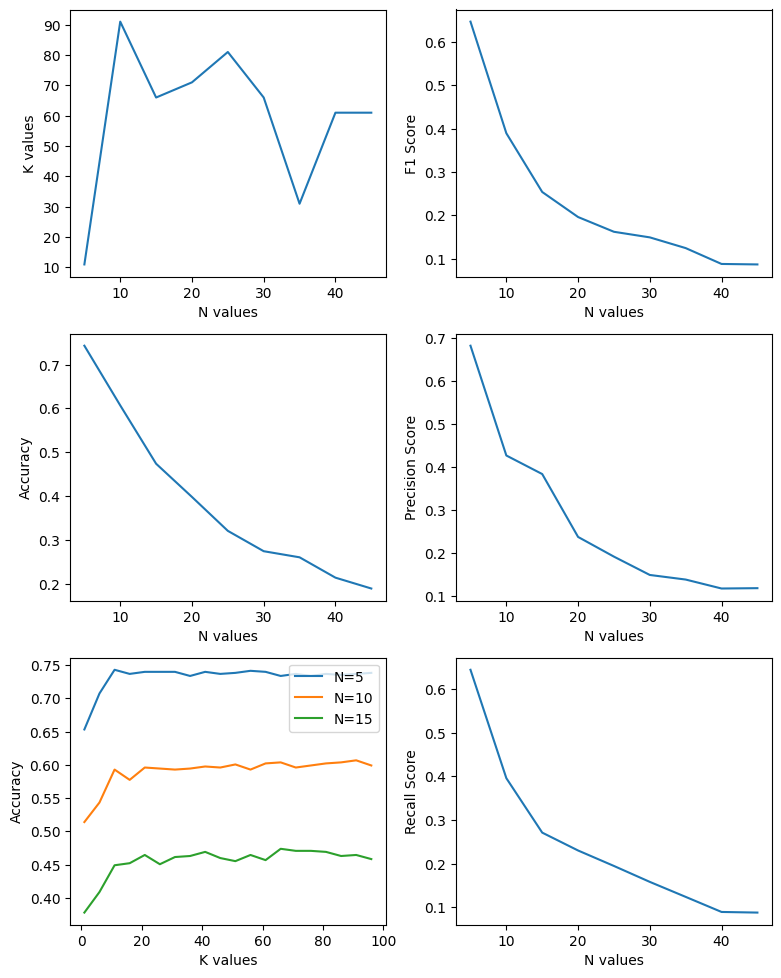

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import matplotlib.pyplot as plt


df = pd.read_csv('tmdb_5000_movies.csv')
df = df[(df != 0).all(axis=1)]
df['revenue'] = np.log(df['revenue'])
df['budget'] = np.log(df['budget'])

m_accuracy = -1
m_precision = []
m_recall = -1
m_avg_prec = -1
m_f1 = -1
m_n = -1
m_k = -1


n_values = []
k_values = []
accuracy_values = []
f1_values = []
f1_k_values = []
recall_values = []
precision_values = []

n_k_acc_tuples = []

N = 50
N_values = list(range(5, N, 5))
# N_values = [10]
for i in N_values:
  n_values.append(i)
  n = i
  df['binned_revenue'] = pd.cut(df['revenue'], bins=n, labels=[f'Bin_{i+1}' for i in range(n)])

  X = df[['budget', 'vote_average']].values
  y = df['binned_revenue'].values

  # TODO: Normailze values


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

  # Initialize and train the KNN classifier
  K = 100
  K_values = list(range(1, K, 5))
  local_max_k = -1
  local_max_accuracy = -1
  local_max_k_f1 = -1
  local_max_f1 = -1
  local_max_recall = -1
  local_max_precision = -1
  for j in K_values:
    k = j  # Number of neighbors
    # print("n = ", n, ", k = ", k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    n_k_acc_tuples.append((n, k, accuracy))
    if accuracy > m_accuracy:
      m_accuracy = accuracy
      m_n = n
      m_k = k

      m_precision = precision_score(y_test, y_pred, average=None)
      m_avg_prec = precision_score(y_test, y_pred, average='macro')
      m_recall = recall_score(y_test, y_pred, average='macro')
      m_f1 = f1_score(y_test, y_pred, average='macro')
    # print("Accuracy:", accuracy)

    if accuracy > local_max_accuracy:
      local_max_k = k
      local_max_accuracy =accuracy
    f1 = f1_score(y_test, y_pred, average='macro')
    if f1> local_max_f1:
      local_max_k_f1 = k
      local_max_f1 = f1
    recall = recall_score(y_test, y_pred, average='macro')
    if recall > local_max_recall:
      local_max_recall = recall
    prec = precision_score(y_test, y_pred, average='macro')
    if prec > local_max_precision:
      local_max_precision = prec
  k_values.append(local_max_k)
  accuracy_values.append(local_max_accuracy)
  f1_values.append(local_max_f1)
  precision_values.append(local_max_precision)
  recall_values.append(local_max_recall)
  f1_k_values.append(local_max_k_f1)


print("n = ", m_n, ", k = ", m_k)
print("Accuracy:", m_accuracy)
print("Precision: ", m_precision)
print("Average Precision: ", m_avg_prec)
print("Recall: ", m_recall)
print("F1 Score", m_f1)

print(n_values)
print(k_values)
print(accuracy_values)

fig, axes = plt.subplots(3, 2, figsize=(8, 10))
print(len(n_values), len(k_values))
fig.tight_layout(pad=2)
axes[0,0].plot(np.array(n_values), np.array(k_values))
axes[0,0].set_xlabel("N values")
axes[0,0].set_ylabel("K values")
axes[1,0].plot(np.array(n_values), np.array(accuracy_values))
axes[1,0].set_xlabel("N values")
axes[1,0].set_ylabel("Accuracy")

# ploting for n = 5, 10 ,15

n_5 = [x for x in n_k_acc_tuples if x[0] == 5]
n_5_k = [x[1] for x in n_5]
n_5_acc = [x[2] for x in n_5]
n_10 = [x for x in n_k_acc_tuples if x[0] == 10]
n_10_k = [x[1] for x in n_10]
n_10_acc = [x[2] for x in n_10]
n_15 = [x for x in n_k_acc_tuples if x[0] == 15]
n_15_k = [x[1] for x in n_15]
n_15_acc = [x[2] for x in n_15]

axes[2,0].plot(n_5_k, n_5_acc, label="N=5")
axes[2,0].plot(n_10_k, n_10_acc, label="N=10")
axes[2,0].plot(n_15_k, n_15_acc, label="N=15")
axes[2,0].set_xlabel("K values")
axes[2,0].set_ylabel("Accuracy")
axes[2,0].legend()

axes[0,1].plot(np.array(n_values), np.array(f1_values))
axes[0,1].set_xlabel("N values")
axes[0,1].set_ylabel("F1 Score")
axes[1,1].plot(np.array(n_values), np.array(precision_values))
axes[1,1].set_xlabel("N values")
axes[1,1].set_ylabel("Precision Score")
axes[2,1].plot(np.array(n_values), np.array(recall_values))
axes[2,1].set_xlabel("N values")
axes[2,1].set_ylabel("Recall Score")
